In [1]:

import numpy as np
import sys
import itertools as itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter
import matplotlib.colors as mcolors
import pandas as pd
from pathlib import Path
import pickle
from typing import Any

sys.path.append("..")
sys.path.append("../..")

from python.plot_utils import add_ons

In [2]:
def manual_colorbar(
    fig,
    cmap=plt.get_cmap("turbo"),
    norm=mcolors.Normalize(0, 40),
    position=[1.01, 0.07, 0.02, 0.92],
    cbar_ticks=[0, 8, 16, 24, 32, 40],
    cbar_ticklabels=[0, 8, 16, 24, 32, 40],
    tick_size=20,
    colorbar_label=r"$\mathcal{D}$",
    label_size=22,
    colorbar_pad=10,
    label_position='top'  # Adding an argument to specify the position of the label
):
    
    cax = fig.add_axes(position)  # [left, bottom, width, height]

    # Create the colorbar
    cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
    cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels(cbar_ticklabels)
    cbar.ax.tick_params(labelsize=tick_size)  # Adjust tick label size if needed
    cbar.ax.minorticks_off()
    
    # Move the label to the top
    cbar.ax.set_title(
        colorbar_label, fontsize=label_size, pad=colorbar_pad, loc="center"
    )
    
    return fig


def filter_file(f: Path, suffix: str) -> bool:
    return f.is_file() and (f.suffix == suffix) and f.stat().st_size > 0


def load_result(
    location: str = ".",
    conditions: list[str] | None = None,
    sort_values: list[str] = ["ZZ", "h"],
    verbose: bool = False,
) -> pd.DataFrame:

    # * Scan the result directory and gather result files
    result_dir = Path(f"{location}")

    # Recursively find all .pkl files in result_dir and subdirectories
    result_files = list(result_dir.rglob("*.pkl"))

    # * Read files
    results: list[dict[str, Any]] = []
    for it, file in enumerate(result_files):
        if verbose:
            print(f"{it} ", end="")
        
        if file.is_file():
            with open(file, "rb") as f:
                results.append(pickle.load(f))

    # * Concatenate to single dataframe
    df = pd.DataFrame(results)

    if verbose:
        print(f"\n")

    if conditions is None:
        if sort_values is None:
            return df
        else:
            return df.sort_values(by=sort_values, ascending=True)
    else:
        if verbose:
            print(f"Query in progress")
        for condition in conditions:
            df = df.query(condition)
    
        if len(df) > 0:
            if sort_values is None:
                return df
            else:
                return df.sort_values(by=sort_values, ascending=True)
        else:
            return None



In [3]:
location = f"numpy/critical_point"
df = load_result(
    location,
    sort_values = ["L", "NKeep", "ZZ"],
)


In [4]:
df

,L,XY,ZZ,h,NKeep,NSweep,diag,Krylov,cutoff,two,ground_MPS,ground_state_energy,Neumann_entropy,ground_energies,spin_z,spin_correlations
2504,64,1,0.80,0,16,20,True,5,0.01,True,[],-26.3523260+0.0000000j,"[(1.0000000000000056+0j), (0.623282687149059+0...","[(-26.344353495131255+0j), (-26.35084711906995...",[],[]
2468,64,1,0.81,0,16,20,True,5,0.01,True,[],-26.4407870+0.0000000j,"[(1.00000000000001+0j), (0.6227275842127282+0j...","[(-26.43280769939146+0j), (-26.43930688486695+...",[],[]
2472,64,1,0.82,0,16,20,True,5,0.01,True,[],-26.5295260+0.0000000j,"[(1.0000000000000129+0j), (0.6222012662907874+...","[(-26.52153922734373+0j), (-26.52804431525035+...",[],[]
2476,64,1,0.83,0,16,20,True,5,0.01,True,[],-26.6185430+0.0000000j,"[(1.0000000000000133+0j), (0.6217036863136147+...","[(-26.610548141499525+0j), (-26.61705951610179...",[],[]
2480,64,1,0.84,0,16,20,True,5,0.01,True,[],-26.7078380+0.0000000j,"[(1.0000000000000109+0j), (0.6212347993157461+...","[(-26.699834517669142+0j), (-26.70635260836157...",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,8192,1,1.20,0,128,20,True,5,0.01,True,[],-3879.973432+0.000000j,"[(0.9996880421663967+0j), (0.6244214186165873+...","[(-3879.933632358871+0j), (-3883.8188912023047...",[],[]
2971,8192,1,1.21,0,128,20,True,5,0.01,True,[],-3892.905628+0.000000j,"[(0.9993524565385595+0j), (0.62443941986338+0j...","[(-3892.8604854971936+0j), (-3895.580813542219...",[],[]
2972,8192,1,1.22,0,128,20,True,5,0.01,True,[],-3905.874345+0.000000j,"[(0.9942198981316217+0j), (0.6186363617924653+...","[(-3905.8305992004766+0j), (-3907.713389279615...",[],[]
2973,8192,1,1.23,0,128,20,True,5,0.01,True,[],-3918.884781+0.000000j,"[(0.9946616972921737+0j), (0.6214197164119832+...","[(-3918.8445347337524+0j), (-3921.551170082366...",[],[]


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.interpolate import griddata


def plot_pcolormesh(
    xdata,
    ydata,
    plotdata,
    method: str = "linear",
    vmin: float = -1,
    vmax: float = 1,
    x_label: str | None = None,
    y_label: str | None = None,
    cbar_label: str | None = None,
    fontsize: int = 12,
):

    fig, ax = plt.subplots(constrained_layout=True)

    # Create a grid for interpolation
    x_unique = np.unique(xdata)
    y_unique = np.unique(ydata)
    x_grid, y_grid = np.meshgrid(x_unique, y_unique)

    # Interpolate mu values onto the grid
    data_grid = griddata(
        points=(xdata, ydata),
        values= plotdata,
        xi=(x_grid, y_grid),
        method=method  # Using 'linear' as previously determined
    )

    # Debug: Check the range of data_grid
    print("data_grid min:", np.min(data_grid), "max:", np.max(data_grid))
    print("Any NaN in data_grid?:", np.isnan(data_grid).any())

    # Create a custom blue-white-red colormap
    # Define the colors: blue at -1, white at 0, red at 1
    colors = ['blue', 'white', 'red']
    positions = [0, 0.5, 1]  # Normalized positions: -1 maps to 0, 0 to 0.5, 1 to 1
    # custom_cmap = mcolors.LinearSegmentedColormap.from_list('blue_white_red', list(zip(positions, colors)))
    custom_cmap = "turbo"

    # Create the pcolormesh plot with the custom colormap
    # plt.figure(figsize=(8, 6))
    mesh = ax.pcolormesh(
        x_grid, y_grid, data_grid,
        cmap=custom_cmap,  # Use the custom blue-white-red colormap
        vmin=vmin, vmax=vmax,  # Set the colorbar range
        shading='auto'  # Automatically determine cell edges
    )
    cbar = fig.colorbar(mesh, extend='both')  # Extend to show out-of-range values
    if cbar_label is not None:
        cbar.set_label(label=cbar_label, fontsize=fontsize)
    
    if x_label is not None:
        ax.set_xlabel(x_label, fontsize=fontsize)
    if y_label is not None:
        ax.set_ylabel(y_label, fontsize=fontsize)

    ax.grid(True)
    
    fig, ax = add_ons(fig, ax)
    
    return fig, ax


In [17]:
Ls = np.array([64, 128, 256, 512, 1024, 2048, 4096])
NKeeps = np.array([16, 32, 64, 128])


Text(0.5, 0.98, '$\\chi=128$')

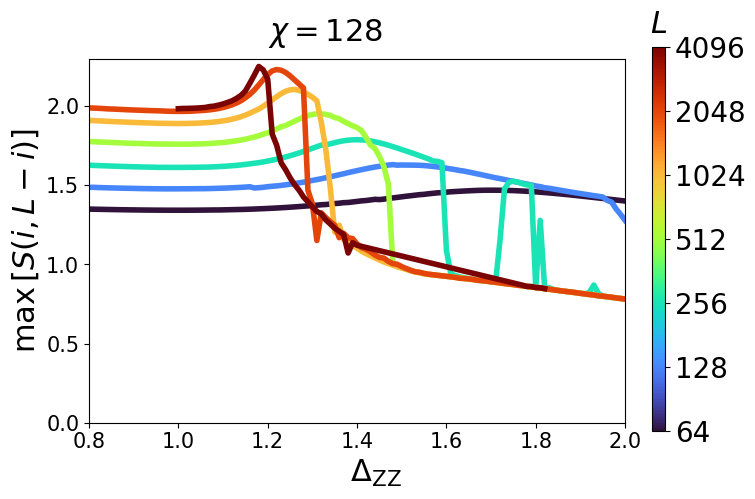

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(constrained_layout=True)

# Assuming Ls, df, and other variables are defined
# Desired L values for labels and ticks
# desired_Ls = [64, 128, 256, 512, 1024, 2048]

# # Filter Ls to only include values in desired_Ls
# Ls = [L for L in Ls if L in desired_Ls]

# Create a colormap instance
cmap = plt.get_cmap('turbo')
# Use LogNorm for logarithmic scale, with vmin and vmax based on filtered Ls
norm = LogNorm(vmin=min(Ls), vmax=max(Ls))

# Create a scalar mappable for mapping L values to colors
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

for L in Ls:
    single_df = df.query(f"L=={L}").query(f"NKeep=={128}")
    ZZ = np.array(single_df["ZZ"]).real
    Neumann_entropy = np.array(single_df["Neumann_entropy"].to_list()).real
    
    # Plot each line with a color from the turbo colormap
    ax.errorbar(ZZ, Neumann_entropy.max(axis=1), color=cmap(norm(L)), linewidth=4)

manual_colorbar(
    fig = fig,
    norm = norm,
    position = [1.01, 0.13, 0.02, 0.8],
    cbar_ticks = Ls,
    cbar_ticklabels = Ls,
    colorbar_label = r"$L$",
)

fig, ax = add_ons(fig, ax,)

# Set plot limits
ax.set_xlim(0.8, 2)
ax.set_ylim(0, 2.3)

# Add a colorbar with specific tick labels and no additional ticks

# Add labels and title
ax.set_xlabel(r'    $\Delta_\mathrm{ZZ}$', fontsize=22)
ax.set_ylabel(r'$\mathrm{max}\,\left[S(i,L-i)\right]$', fontsize=22)
fig.suptitle(r'$\chi=128$', fontsize=22)


Text(0.5, 0.98, '$\\chi=128$')

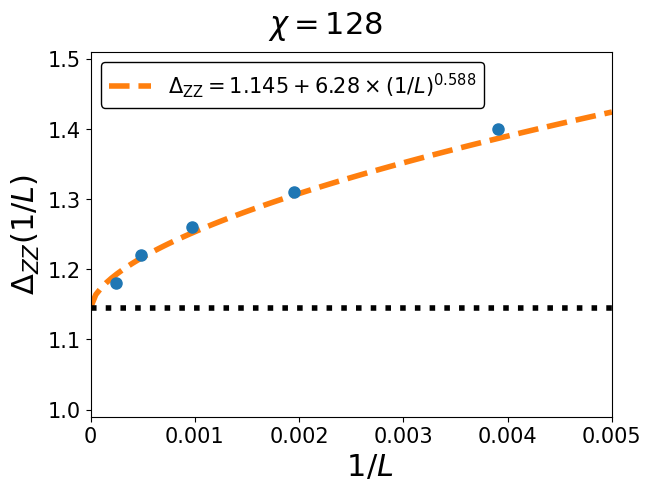

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit

fig, ax = plt.subplots(constrained_layout=True)

# desired_Ls = [256, 512, 1024, 2048]

# Filter Ls to only include values in desired_Ls
# Ls = [L for L in Ls if L in desired_Ls]

inverse_sizes = []
Delta_ZZs = []

for L in Ls:
    single_df = df.query(f"L=={L}").query(f"NKeep=={128}")
    ZZ = np.array(single_df["ZZ"]).real
    Neumann_entropy = np.array(single_df["Neumann_entropy"].to_list()).real
    
    # Plot each line with a color from the turbo colormap
    
    inverse_sizes.append(1/L)
    Delta_ZZs.append(ZZ[Neumann_entropy.max(axis=1).argmax()])
    # ax.errorbar(1/L, ZZ[Neumann_entropy.max(axis=1).argmax()], fmt="o", markersize=5, color="black")

inverse_sizes = np.array(inverse_sizes)
Delta_ZZs = np.array(Delta_ZZs)

ax.errorbar(inverse_sizes, Delta_ZZs, fmt="o", markersize=8)

xticks = [0, 1e-3, 2e-3, 3e-3, 4e-3, 5e-3]
xticklabels = xticks


def fitting(x, a, b, c):
    return a + b*x**c

params, _ = curve_fit(fitting, inverse_sizes, Delta_ZZs)

# params = [1, 5, 0.45]

xlims = np.linspace(0, 0.005, 100)

ax.errorbar(xlims, fitting(xlims, *params), linestyle="--", linewidth=4, zorder=0, label=rf"$\Delta_\mathrm{{ZZ}}={round(params[0],3)}+{round(params[1],3)}\times (1/L)^{{{round(params[2],3)}}}$")

# ax.axhline(params[0], linestyle=":", color="black", linewidth=4, label=rf"$\Delta_\mathrm{{ZZ}}={round(params[0],3)}$")
ax.axhline(params[0], linestyle=":", color="black", linewidth=4,)

# Set plot limits
ax.set_xlim(0, 0.005)
ax.set_ylim(0.99, 1.51)

# Add a colorbar with specific tick labels and no additional ticks

fig, ax = add_ons(
    fig, ax, xticks = xticks,
    xticklabels = xticklabels,
    show_legend=True,
    legend_loc="upper left",
)

# Add labels and title
ax.set_xlabel(r'    $1/L$', fontsize=22)
ax.set_ylabel(r'$\Delta_{ZZ}(1/L)$', fontsize=22)
fig.suptitle(r'$\chi=128$', fontsize=22)
